<a href="https://colab.research.google.com/github/parrisatwork/Resampling-Datetime/blob/main/(Core)_Resampling_Datetime_Data_Parris_Trimingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries/Data

In [39]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [40]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


# 1. Convert the date column to datetime dtype

In [41]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

# 2. Set the date column as the index

In [43]:
df = df.set_index('date')

In [44]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

# 3. Filter out only the required data:

Keep only data from the year 2000 or later.
Keep only the following features:
-precipitation
-mean_temp
-min_temp
-max_temp
-snow_depth

In [45]:
df.index.strftime('%Y').unique()

Index(['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='date')

In [46]:
df = df.loc['2000':]
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [49]:
df.index.strftime('%Y').unique()

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object', name='date')

In [50]:
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


# 4. Impute any missing values.

In [7]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
df.isna().sum().sum()

3337

In [51]:
((df.isna().sum() / len(df)) * 100).round(2)

precipitation     5.08
mean_temp         5.46
min_temp          5.03
max_temp          5.08
snow_depth       22.84
dtype: float64

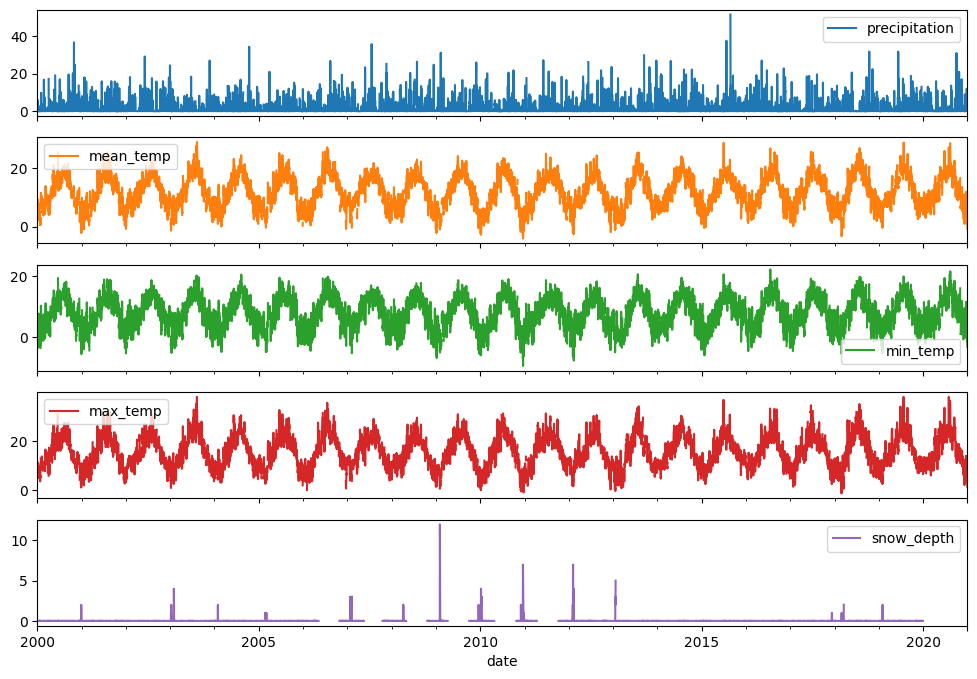

In [52]:
df.plot(figsize=(12,8), subplots=True);

### Resample

In [53]:
agg_dict = {'precipitation': 'sum', 'mean_temp': 'mean'}

df_month = df.copy()
df_month = df.resample('M').agg(agg_dict['precipitation'])
df_month

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-31,14.3,159.5,78.3,236.6,0.0
2000-02-29,62.2,200.9,110.0,288.0,0.0
2000-03-31,13.4,254.6,147.0,366.2,0.0
2000-04-30,71.8,256.1,149.9,373.5,0.0
2000-05-31,68.4,402.4,278.9,520.2,0.0
...,...,...,...,...,...
2020-08-31,45.2,578.1,463.8,712.6,0.0
2020-09-30,19.2,479.6,334.8,625.6,0.0
2020-10-31,143.4,331.5,257.9,418.3,0.0


In [54]:
df_year = df.copy()
df_year = df.resample('A').agg(agg_dict['mean_temp'])
df_year

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-12-31,2.107289,11.532070,7.973469,15.108746,0.008746
2001-12-31,1.952023,11.313006,7.641618,14.965029,0.000000
2002-12-31,2.148286,12.006286,8.353143,15.732000,0.000000
2003-12-31,1.311396,12.232764,7.986040,16.494302,0.025641
2004-12-31,1.710951,11.872046,8.212392,15.514409,0.005764
2005-12-31,1.218497,11.879883,8.026301,15.732659,0.008721
2006-12-31,1.737931,12.387941,8.518103,16.173276,0.000000
2007-12-31,1.881449,12.063717,8.218551,15.942609,0.032609
2008-12-31,1.755932,11.174855,7.451412,15.025141,0.021858


### Impute Missing Values

In [55]:
df_month.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [56]:
df_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       1
dtype: int64

In [58]:
df_year = df_year.interpolate()
df_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

Q1: What month had the most precipitation between 2000 through 2010?

-Resample the data as Monthly frequency.

-Find the date and corresponding value for the max precipitation.

-Plot the feature and time period that corresponds to the question.

-Make sure to meet the "Visualization Requirements" below!

-Determine the date and value for the most precipitation (the max precipitation).

-Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.

-Make sure to add a legend so that your label is visible.

In [59]:
df_month = df_month.loc['2000':'2010']
df_month.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=132, freq='M')

In [60]:
df_month.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-31,14.3,159.5,78.3,236.6,0.0
2000-02-29,62.2,200.9,110.0,288.0,0.0
2000-03-31,13.4,254.6,147.0,366.2,0.0
2000-04-30,71.8,256.1,149.9,373.5,0.0
2000-05-31,68.4,402.4,278.9,520.2,0.0


## Date and Value for Max Precipitation

In [61]:
df_month.loc[df_month['precipitation'].idxmax()]

precipitation    138.4
mean_temp        288.1
min_temp         214.1
max_temp         356.1
snow_depth         0.0
Name: 2009-11-30 00:00:00, dtype: float64

In [62]:
precipitation, mean_temp, min_temp, max_temp, snow_depth = df_month.loc[df_month['precipitation'].idxmax()]

In [63]:
date = df_month.loc[df_month['precipitation'].idxmax()].name.date()
print(date)

2009-11-30


In [64]:
print(f'Date of highest precipitation: {date}')
print(f'Precipitation: {precipitation}')

Date of highest precipitation: 2009-11-30
Precipitation: 138.4


## Visualization

In [65]:
ts_2010 = df_month['precipitation']
ts_2010

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

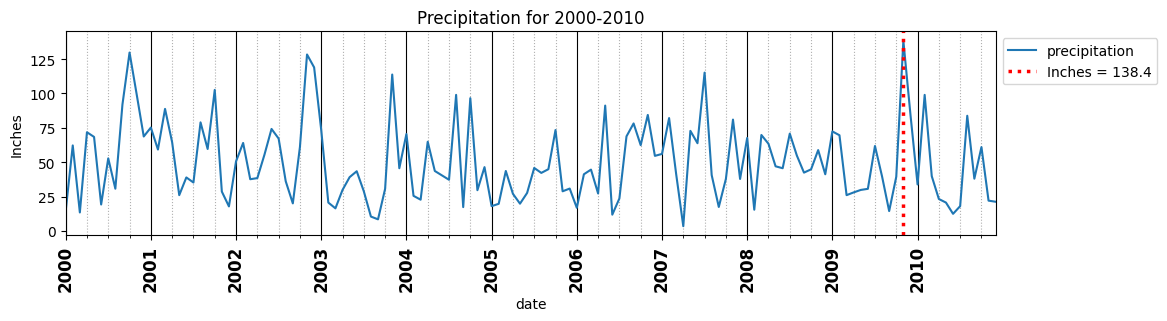

In [66]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Precipitation for 2000-2010')

ts_2010.plot(style='-')


## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),
                   fontsize='large',
                   fontweight='bold')


## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.axvline(date ,color='red',lw=2.5, ls=':', label=f'Inches = {precipitation}')

plt.ylabel('Inches')

ax.legend(bbox_to_anchor=[1,1]);

### 4-30-2002 had the most precipitation between 2000 through 2010, and the value of precipitation was 13.8 inches.

# Q2: Which year between 2000-2020 had the coolest average temperature?

-Resample the data as Yearly frequency.

-Plot the feature and time period that corresponds to the question.

 -Make sure to meet the "Visualization Requirements" below!

-Determine the date and value for the lowest mean temp.

-Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

In [23]:
#create temporary dataframe
q2 = df['mean_temp'].copy()

In [24]:
#create a filter to filter data between 2000 through 2020
date_filter = q2.index <= '2020-12-31'

In [25]:
#apply the filter
q2 = q2[date_filter]

In [26]:
q2.tail()

date
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, dtype: float64

In [27]:
q2.head()

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
Name: mean_temp, dtype: float64

In [28]:
# Resample the data as Yearly frequency.
q2_temp = q2.asfreq("Y")
q2_temp.head(5)

date
2000-12-31     2.8
2001-12-31     1.0
2002-12-31     7.3
2003-12-31     3.3
2004-12-31    10.6
Freq: A-DEC, Name: mean_temp, dtype: float64

In [29]:
q2_temp.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

## Plot the feature and time period

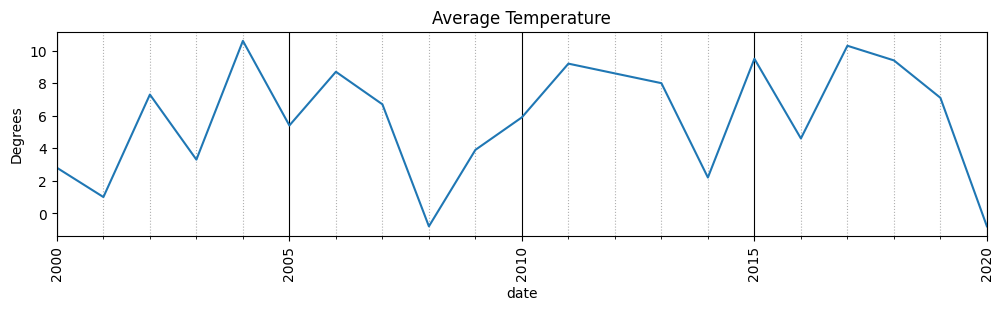

In [30]:
fig, ax = plt.subplots(figsize=(12,3))
q2_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

## Determine the date and value for the lowest mean temp.

In [31]:
# Determine the date and value for the lowest mean temp.
min_date = q2_temp.idxmin()
min_date

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [32]:
# Find the value for the max precipitation
q2_temp[q2_temp.index == '2008-12-31 00:00:00']

date
2008-12-31   -0.8
Freq: A-DEC, Name: mean_temp, dtype: float64

In [33]:
# Double-check above
q2_temp.sort_values(ascending=True)

date
2020-12-31    -0.8
2008-12-31    -0.8
2001-12-31     1.0
2014-12-31     2.2
2000-12-31     2.8
2003-12-31     3.3
2009-12-31     3.9
2016-12-31     4.6
2005-12-31     5.4
2010-12-31     5.9
2007-12-31     6.7
2019-12-31     7.1
2002-12-31     7.3
2013-12-31     8.0
2012-12-31     8.6
2006-12-31     8.7
2011-12-31     9.2
2018-12-31     9.4
2015-12-31     9.5
2017-12-31    10.3
2004-12-31    10.6
Name: mean_temp, dtype: float64

#### The lowest temperature between years 2000 and 2020 was -0.8 degrees on 12/31/2008 AND on 12/31/2020

## Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

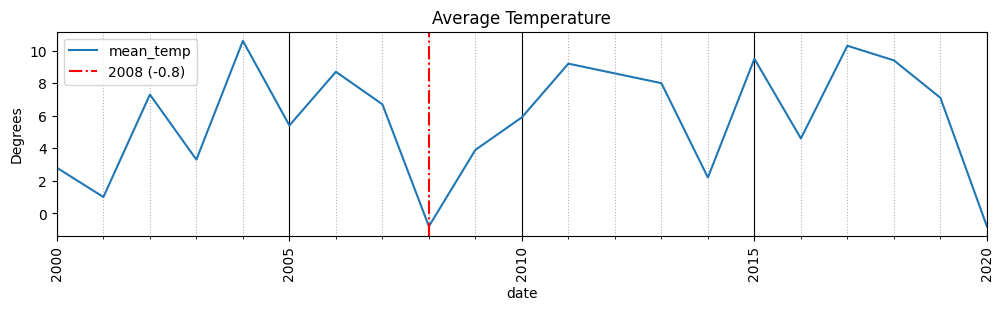

In [34]:
fig, ax = plt.subplots(figsize=(12,3))
q2_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

# Add a line for the max precipitation date and value
ax.axvline(min_date, color = 'red', ls ="-.", label=f'2008 ({q2_temp.min()})')
ax.legend();